In [89]:
import pandas as pd 
import matplotlib.pyplot as plt

# Part 1-Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [90]:
time_format = '%Y-%m-%d %H:%M'

data = pd.read_json('/Users/asifbala/Local-SpringBoard/ultimate_challenge/logins.json')

date_list = list(data['login_time'])

data = pd.to_datetime(date_list, format=time_format)

series = pd.Series(range(len(data)), index=data)

series.index.name = 'Date'

series.name= 'Counts'

series_15_min = series.resample('15T').count()

print(series_15_min.head())

print(series_15_min.tail())

Date
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: Counts, dtype: int64
Date
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: Counts, dtype: int64


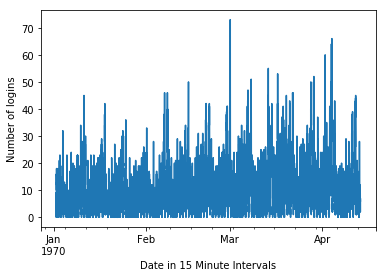

In [91]:
series_15_min_plot = series_15_min.plot()

series_15_min_plot.set_xlabel('Date in 15 Minute Intervals')

series_15_min_plot.set_ylabel('Number of logins')

plt.show()

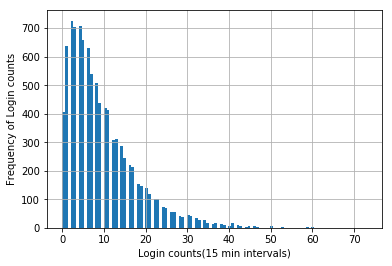

In [92]:
series_15_min.hist(bins=110)
plt.xlabel('Login counts(15 min intervals)')
plt.ylabel('Frequency of Login counts')
plt.show()

Pick any single day and see results. St.Patricks day for example.

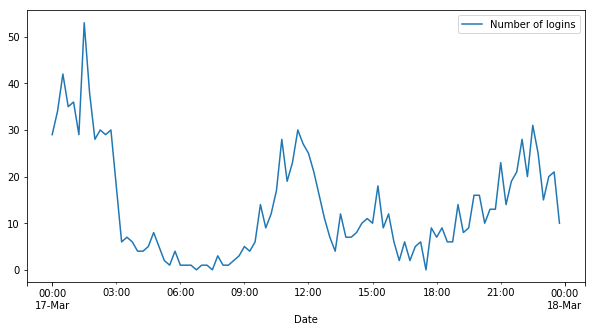

In [93]:
series_15_min['1970-03-17': '1970-03-17'].plot(figsize=(10,5))
plt.legend(['Number of logins'])
plt.show()

A lot of users are logging in from about 1:30 AM to 2 AM where it drops drastically to about 3 AM. The overall trend steadily increases from about 7:30 am to noon. There is another large drop from noon to about 1:30 PM. It then trends upwards up until about 3 PM then steadily drops until 6 PM. There is an overall increasing trend from about 6 PM to 10:30 PM where it sharply drops until midnight.